<a href="https://colab.research.google.com/github/Chanwoochan/MOTOR/blob/main/%EA%B8%B0%EC%96%B4_%EA%B5%BD%ED%9E%98%EA%B0%95%EB%8F%84_%EA%B3%84%EC%82%B0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
# y_database
y_v = [0.277, 0.292, 0.308, 0.319, 0.325, 0.33 , 0.335, 0.34 , 0.346,
        0.352, 0.354, 0.359, 0.363, 0.367, 0.372, 0.377, 0.383, 0.388,
        0.394, 0.4  , 0.404, 0.407, 0.411, 0.413, 0.418, 0.422, 0.424,
        0.428, 0.431, 0.433, 0.436, 0.44 , 0.443, 0.445, 0.45 , 0.454,
        0.464, 0.474, 0.484]
y_n = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24,
       25, 26, 28, 30, 32, 34, 36, 38, 40, 42, 43, 45,
       48, 50, 52, 55, 58, 60, 65, 70, 75, 80, 90, 100,
       150, 300, 100000000]

In [5]:
def sel_y(N):
  temp = N
  if N in y_n :
    n = y_n.index(N)
    return y_v[n]
  while 1:
    temp = temp + 1
    if temp in y_n :
      n = y_n.index(temp)
      break
  value = (y_v[n-1]*(y_n[n]-N)+y_v[n]*(N-y_n[n-1]))/(y_n[n]-y_n[n-1])
  return value

In [6]:
def bending(limstr,m,b,y,fv,S) :
  P = limstr*b*m*.001*y*fv/S
  return P


## 수정 Lewis 강도계산식
* bending 함수를 정의해 P를 계산한다.

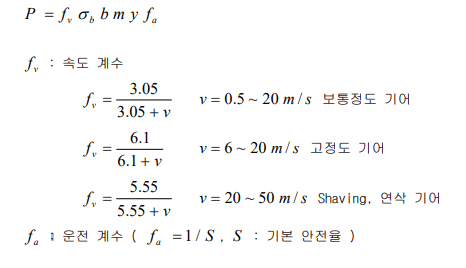

In [7]:
N = 18 # 잇수
m = 1 # 모듈 0.5
limstr = 490*10**6 # s45c 허용응력
b = 0.01 # 기어 폭
y = sel_y(N) # 치형계수
fv = 0.94 # 속도계수
S = 1 # 안전계수
print('y =',y)

y = 0.335


* 변수 지정 및 계산

In [8]:
value_N = bending(limstr,m,b,y,fv,S)
value_Nm = value_N * (N * m / 2) *.001
print(value_Nm ,"N.m")

13.88709 N.m


In [11]:
N = 18 # 잇수
m = 1 # 모듈 0.5
limstr = 490*10**6 # s45c 허용응력
y = sel_y(N) # 치형계수
fv = 0.94 # 속도계수
S = 1 # 안전계수
R = 4  # 감속비

b = 0
while 1:
  b = b + 0.0001
  value_N = bending(limstr,m,b,y,fv,S)
  P = value_N * (N * m / 2) *.001
  if P > (20.5 * R / 3) :
    print("최소 b :", b*1000, "mm")
    print("P_max :", P, "N.m")
    break

최소 b : 19.699999999999935 mm
P_max : 27.35756729999991 N.m


In [12]:
b = 0.02 # 기어 폭을 2cm로 한다면,

N = 18 # 잇수
m = 1 # 모듈 0.5
limstr = 490*10**6 # s45c 허용응력
y = sel_y(N) # 치형계수
fv = 0.94 # 속도계수
S = 1 # 안전계수
R = 4  # 감속비

value_N = bending(limstr,m,b,y,fv,S)
P = value_N * (N * m / 2) *.001
T_mot = P * 3 / R
T_out = P * 3
print("P :", P, "N.m")
print("T_motor :", T_mot, "N.m")
print("T_out :", T_out, "N.m")

P : 27.77418 N.m
T_motor : 20.830635 N.m
T_out : 83.32254 N.m


# sun 기어의 경우를 생각하자.

In [ ]:
N = 15 # 잇수
m = 0.5 # 모듈 0.5
limstr = 490*10**6 # s45c 허용응력
b = 0.01 # 기어 폭
y = sel_y(N) # 치형계수
fv = 0.94 # 속도계수
S = 1 # 안전계수
print('y =',y)

y = 0.319


* 변수 지정 및 계산

In [ ]:
value_N = bending(limstr,m,b,y,fv,S)
value_Nm = value_N * (N * m / 2) *.001
print(value_Nm ,"N.m")

2.7549637500000004 N.m


In [ ]:
N = 15 # 잇수
m = 0.5 # 모듈 0.5
limstr = 490*10**6 # s45c 허용응력
y = sel_y(N) # 치형계수
fv = 0.94 # 속도계수
S = 1 # 안전계수
R = 7  # 감속비

b = 0
while 1:
  b = b + 0.0001
  value_N = bending(limstr,m,b,y,fv,S)
  P = value_N * (N * m / 2) *.001
  if P > (20.5 / 3) :
    print("최소 b :", b*1000, "mm")
    print("P_max :", P, "N.m")
    T_mot = P * 3
    T_out = T_mot * R
    print("T_motor :", T_mot, "N.m")
    print("T_out :", T_out, "N.m")
    break

최소 b : 24.899999999999906 mm
P_max : 6.859859737499975 N.m
T_motor : 20.579579212499926 N.m
T_out : 144.05705448749947 N.m


In [ ]:
b = 0.02 # 기어 폭을 2cm로 한다면,

N = 15 # 잇수
m = 0.5 # 모듈 0.5
limstr = 490*10**6 # s45c 허용응력
y = sel_y(N) # 치형계수
fv = 0.94 # 속도계수
S = 1 # 안전계수
R = 7  # 감속비

value_N = bending(limstr,m,b,y,fv,S)
P = value_N * (N * m / 2) *.001
T_mot = P * 3
T_out = T_mot * R
print("P :", P, "N.m")
print("T_motor :", T_mot, "N.m")
print("T_out :", T_out, "N.m")

P : 5.509927500000001 N.m
T_motor : 16.529782500000003 N.m
T_out : 115.70847750000001 N.m
